In [1]:
import numpy as np # linear algebra
import pandas as pd

In [2]:
import pandas as pd
import re
import string
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [3]:
from google.colab import files

# Step 1: Upload the file
uploaded = files.upload()

Saving SemEval2017-task4-dev.subtask-A.english.INPUT.txt to SemEval2017-task4-dev.subtask-A.english.INPUT (4).txt


In [4]:
# STEP 2: Import pandas and load the txt file
import pandas as pd

# Replace 'yourfile.txt' with the actual file name you uploaded
df = pd.read_csv('/content/SemEval2017-task4-dev.subtask-A.english.INPUT.txt', sep='\t', header=None, names=['tweet_id', 'sentiment', 'tweet_text'])

# Preview the data
df.head()


,tweet_id,sentiment,tweet_text
619950566786113536,neutral,"Picturehouse's, Pink Floyd's, 'Roger Waters: T...",NaN
619969366986235905,neutral,Order Go Set a Watchman in store or through ou...,NaN
619971047195045888,negative,If these runway renovations at the airport pre...,NaN
619974445185302528,neutral,If you could ask an onstage interview question...,NaN
619987808317407232,positive,A portion of book sales from our Harper Lee/Go...,NaN


In [5]:
# Step 2: Load the uploaded file
filename = next(iter(uploaded))

# Try reading as tab-separated (if that's what your file uses)
df = pd.read_csv(
    filename,
    sep='\t',               # Use '\t' for tab-separated files, ',' for CSV
    quotechar='"',          # Handle quoted fields properly
    quoting=3,              # 0 = QUOTE_MINIMAL, 1 = QUOTE_ALL, 2 = QUOTE_NONNUMERIC, 3 = QUOTE_NONE
    engine='python'         # More tolerant parsing
)

# Step 3: Preview data
df.head()


/usr/local/lib/python3.11/dist-packages/google/colab/_dataframe_summarizer.py:88: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  cast_date_col = pd.to_datetime(column, errors="coerce")


,619950566786113536,neutral,"""Picturehouse's, Pink Floyd's, 'Roger Waters: The Walll - opening 29 Sept is now making waves. Watch the trailer on Rolling Stone - look...""",Unnamed: 3
0,619969366986235905,neutral,Order Go Set a Watchman in store or through ou...,NaN
1,619971047195045888,negative,"""If these runway renovations at the airport pr...",NaN
2,619974445185302528,neutral,"""If you could ask an onstage interview questio...",NaN
3,619987808317407232,positive,A portion of book sales from our Harper Lee/Go...,NaN
4,619994586182619136,positive,"""Excited to read """"Go Set a Watchman"""" on Tues...",NaN


In [6]:
# Step 2: Read the file and clean it
df = pd.read_csv(
    filename,
    sep='\t',               # Use '\t' for tab-separated
    header=None,            # Don't assume first row is header
    names=['tweet_id', 'sentiment', 'tweet_text'],  # Assign correct column names
    usecols=[0, 1, 2],      # Only use first 3 columns
    engine='python'         # Tolerant parsing
)

# Step 3: Preview clean DataFrame
df.head()

,tweet_id,sentiment,tweet_text
0,619950566786113536,neutral,"Picturehouse's, Pink Floyd's, 'Roger Waters: T..."
1,619969366986235905,neutral,Order Go Set a Watchman in store or through ou...
2,619971047195045888,negative,If these runway renovations at the airport pre...
3,619974445185302528,neutral,If you could ask an onstage interview question...
4,619987808317407232,positive,A portion of book sales from our Harper Lee/Go...


In [8]:
def clean_text(text):
    text = text.lower()
    text = re.sub(f"[{string.punctuation}]", "", text)
    text = re.sub(r"\d+", "", text)
    text = text.strip()
    return text

df['clean_tweet'] = df['tweet_text'].apply(clean_text)

In [10]:
print(df['clean_tweet'].head())

0    picturehouses pink floyds roger waters the wal...
1    order go set a watchman in store or through ou...
2    if these runway renovations at the airport pre...
3    if you could ask an onstage interview question...
4    a portion of book sales from our harper leego ...
Name: clean_tweet, dtype: object


In [11]:
def clean_text(text):
    text = text.lower()
    text = re.sub(f"[{string.punctuation}]", "", text)
    text = re.sub(r"\d+", "", text)
    text = text.strip()
    return text

In [14]:
df['clean_tweet'] = df['tweet_text'].apply(clean_text)

text = " ".join(df['clean_tweet'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

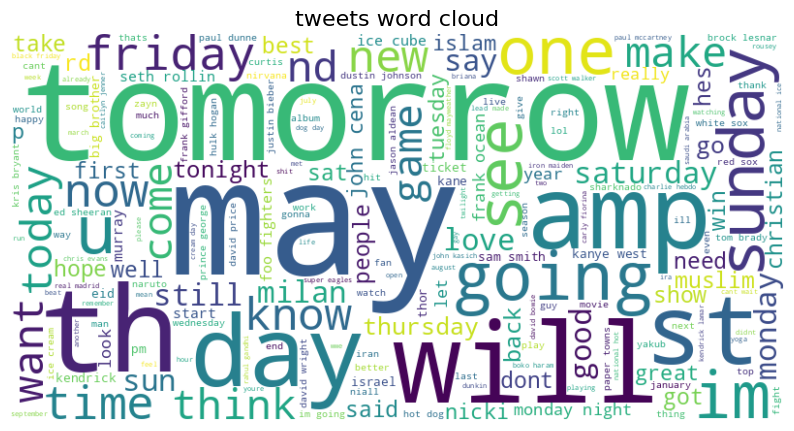

In [15]:
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('tweets word cloud', fontsize=16)
plt.show()

In [13]:
tweets_df.describe()

,tweet_id,sentiment,length
count,2.063200e+04,20632.000000,20632.000000
mean,6.428238e+17,1.185537,114.782862
std,1.769754e+16,0.681424,25.776006
min,6.199506e+17,0.000000,1.000000
25%,6.313438e+17,1.000000,98.000000
50%,6.380166e+17,1.000000,124.000000
75%,6.413125e+17,2.000000,137.000000
max,6.819105e+17,2.000000,158.000000


In [16]:
X = df['clean_tweet']
y = df['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [17]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train_tfidf, y_train)

LogisticRegression(max_iter=1000)

In [18]:
y_pred = model.predict(X_test_tfidf)


In [19]:
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

In [20]:
print(f"accuracy: {accuracy}")
print(f"classify report:\n {classification_rep}")

accuracy: 0.6450205960746305
classify report:
               precision    recall  f1-score   support

    negative       0.59      0.29      0.39       630
     neutral       0.64      0.80      0.71      2074
    positive       0.68      0.58      0.62      1423

    accuracy                           0.65      4127
   macro avg       0.64      0.55      0.57      4127
weighted avg       0.64      0.65      0.63      4127



In [21]:
# evalueate
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred, output_dict=True)

In [22]:
precision = classification_rep['macro avg']['precision']
recall = classification_rep['macro avg']['recall']
f1 = classification_rep['macro avg']['f1-score']

In [23]:
# output
print(f"accuracy: {accuracy}")
print(f"classifier report:\n {classification_rep}")

accuracy: 0.6450205960746305
classifier report:
 {'negative': {'precision': 0.5915032679738562, 'recall': 0.2873015873015873, 'f1-score': 0.38675213675213677, 'support': 630.0}, 'neutral': {'precision': 0.6355283307810107, 'recall': 0.8003857280617165, 'f1-score': 0.7084933845497225, 'support': 2074.0}, 'positive': {'precision': 0.6790736145574855, 'recall': 0.5769501054111033, 'f1-score': 0.6238601823708206, 'support': 1423.0}, 'accuracy': 0.6450205960746305, 'macro avg': {'precision': 0.6353684044374508, 'recall': 0.5548791402581357, 'f1-score': 0.57303523455756, 'support': 4127.0}, 'weighted avg': {'precision': 0.643822285044499, 'recall': 0.6450205960746305, 'f1-score': 0.6301967931242182, 'support': 4127.0}}


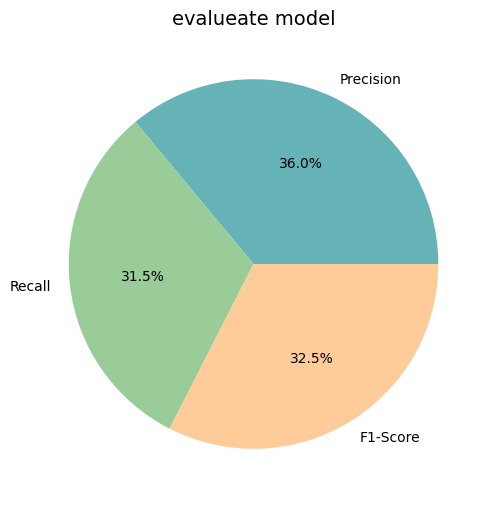

In [24]:
plt.figure(figsize=(8, 6))
plt.pie([precision, recall, f1], labels=['Precision', 'Recall', 'F1-Score'], autopct='%1.1f%%', colors=['#66b3b7', '#99cc99', '#ffcc99'])
plt.title('evalueate model', fontsize=14)
plt.show()